# CS 1656 – Introduction to Data Science

## Instructor: Xiaowei Jia
### Teaching Assistant: Evangelos Karageorgos
### Additional credits: Xiaoting Li, Tahereh Arabghalizi, Zuha Agha, Anatoli Shein, Phuong Pham
## Recitation 6: Networks in Python
---

This recitation focuses on managing and querying graphs. We will use material from https://networkx.github.io/documentation/stable/tutorial.html 

In [28]:
import networkx as nx

Let's first create a simple unidirectional graph

In [29]:
G = nx.Graph()

Let's add two nodes, labeled 4 and 8

In [30]:
G.add_node(4)
G.add_node(8)

Let's add an edge connecting these two nodes

In [31]:
G.add_edge(4,8)

Let's see what we have done.

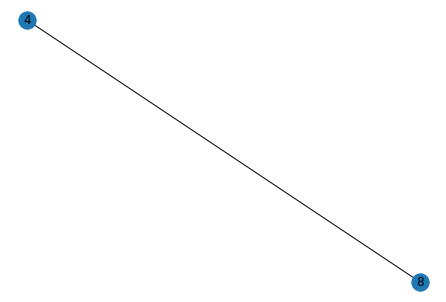

In [32]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()

We can also add nodes and edges in bulk

In [33]:
mynodes = [1,2,3,4,5,6,7,8]
myedges = [(1,2),(3,4),(5,6),(7,8), (4,8)]
G.add_nodes_from(mynodes)
G.add_edges_from(myedges)

Let's see what we have.

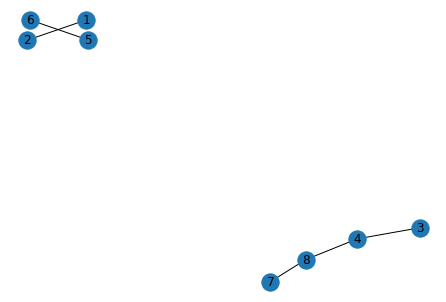

In [34]:
nx.draw(G, with_labels=True)
plt.show()

Some simple statistics on our graph

In [35]:
print ("Number of nodes:",G.number_of_nodes())
print ("Number of edges:",G.number_of_edges())


Number of nodes: 8
Number of edges: 5


Let's see a list of all the nodes and of all the edges.

In [36]:
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges()))

Nodes: [4, 8, 1, 2, 3, 5, 6, 7]
Edges: [(4, 8), (4, 3), (8, 7), (1, 2), (5, 6)]


We can also get the lists of edges from a specific node or specific nodes.

In [37]:
print("Edges in/out of node 4:", list(G.edges(4)))

Edges in/out of node 4: [(4, 8), (4, 3)]


In [38]:
print("Edges in/out of nodes 4 and 5:", list(G.edges([4,5])))

Edges in/out of nodes 4 and 5: [(4, 8), (4, 3), (5, 6)]


Let's add a few more edges, to make it more interesting.

In [39]:
myedges2 = [(1,3),(1,4),(2,5),(2,6),(2,7),(2,8)]
G.add_edges_from(myedges2)

In [40]:
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges()))

Nodes: [4, 8, 1, 2, 3, 5, 6, 7]
Edges: [(4, 8), (4, 3), (4, 1), (8, 7), (8, 2), (1, 2), (1, 3), (2, 5), (2, 6), (2, 7), (5, 6)]


In [41]:
print("Nodes adjacent to node 1:", list(G.adj[1]))

Nodes adjacent to node 1: [2, 3, 4]


In [42]:
print("Nodes neighboring to node 1:", list(G.neighbors(1)))  # Same as .adj[]

Nodes neighboring to node 1: [2, 3, 4]


In [43]:
print("Degree of node 1:", G.degree(1))

Degree of node 1: 3


In [44]:
print("Degree of nodes 1,2:", G.degree([1,2]))

Degree of nodes 1,2: [(1, 3), (2, 5)]


Add an attribute to every node in the graph.

In [45]:
for i in list(G.nodes()):
    print ("Node:",i)
    G.nodes[i]['color'] = 'Blue'
    print ("Node:",G.nodes[i])

Node: 4
Node: {'color': 'Blue'}
Node: 8
Node: {'color': 'Blue'}
Node: 1
Node: {'color': 'Blue'}
Node: 2
Node: {'color': 'Blue'}
Node: 3
Node: {'color': 'Blue'}
Node: 5
Node: {'color': 'Blue'}
Node: 6
Node: {'color': 'Blue'}
Node: 7
Node: {'color': 'Blue'}


Let's now create a directed graph.

In [46]:
DG = nx.DiGraph()
newnodes = (1,2,3,4,5,6)
newedges = [(1,2),(2,3),(3,4),(4,3),(4,5),(5,6),(4,6),(3,6),(6,2)]
DG.add_nodes_from(newnodes)
DG.add_edges_from(newedges)
print("Nodes:", list(DG.nodes()))
print("Edges:", list(DG.edges()))

Nodes: [1, 2, 3, 4, 5, 6]
Edges: [(1, 2), (2, 3), (3, 4), (3, 6), (4, 3), (4, 5), (4, 6), (5, 6), (6, 2)]


Let's print the directed graph. Note the thicker parts at the edges, indicating arrows.

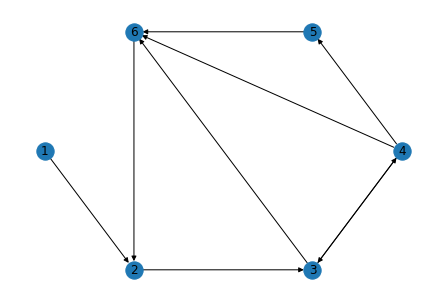

In [47]:
nx.draw_shell(DG, with_labels=True)
plt.show()

Networkx supports many different algorithms, directly on the specified graphs. For more information go to https://networkx.github.io/documentation/stable/reference/algorithms/traversal.html

Let's do a breadth-first traversal of the graph above, starting from node 1.

In [48]:
root = 1
all_edges = nx.bfs_edges(DG,root)  # all edges during breadth-first traversal of graph, starting at root
print ("all_edges:",all_edges)

print ("list(all_edges) #1:", list(all_edges))

print ("list(all_edges) #2:", list(all_edges))

all_edges = nx.bfs_edges(DG,root) # REDO
edgelist = list(all_edges)
print ("Edge List #1:",edgelist)
print ("Edge List #2:",edgelist)

all_edges: <generator object bfs_edges at 0x00000153CA1EBEB0>
list(all_edges) #1: [(1, 2), (2, 3), (3, 4), (3, 6), (4, 5)]
list(all_edges) #2: []
Edge List #1: [(1, 2), (2, 3), (3, 4), (3, 6), (4, 5)]
Edge List #2: [(1, 2), (2, 3), (3, 4), (3, 6), (4, 5)]


In [49]:
print (dict(nx.bfs_successors(DG,root)))

{1: [2], 2: [3], 3: [4, 6], 4: [5]}


## Tasks
You should do the following tasks on your own.

**Task 1**
Given the following code that generates three different graphs (graph1, graph2, graph3), compute the degree for each node and report the highest and the lowest degree over all nodes for each of the graphs. For every graph, print a list of tuples (node, degree_of_node) and a minimum and maximum degree.

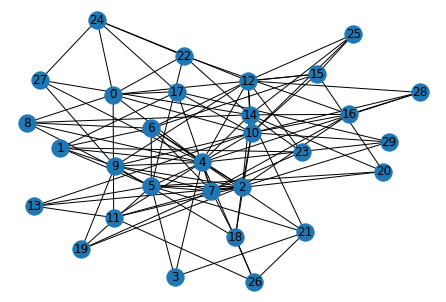

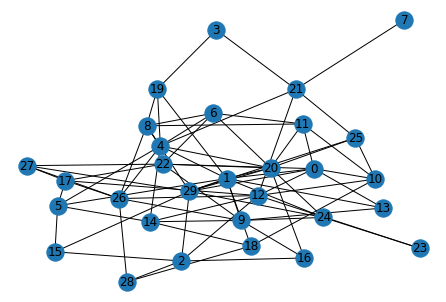

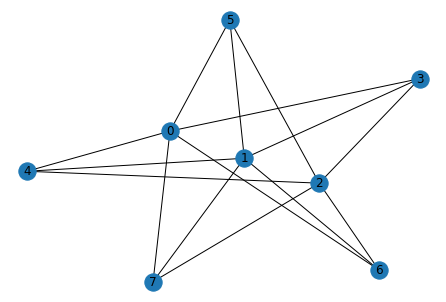

In [50]:
graph1 = nx.barabasi_albert_graph(30, 4)
nx.draw(graph1, with_labels=True)
plt.show()

graph2 = nx.erdos_renyi_graph(30, 0.15)
nx.draw(graph2, with_labels=True)
plt.show()

graph3 = nx.complete_bipartite_graph(3, 5)
nx.draw(graph3, with_labels=True)
plt.show()

Write your code here:

In [51]:
graph1_degree = sorted(graph1.degree, key=lambda x: x[1], reverse=True)
print("List of graph 1's nodes with degrees: ",graph1.degree)
print("MAX DEGREE: Node ",graph1_degree[0][0]," has a degree of ",graph1_degree[0][1])
print("MIN DEGREE: Node ",graph1_degree[-1][0], " has a degree of ",graph1_degree[-1][1])
print("--------------------------------------")

graph2_degree = sorted(graph2.degree, key=lambda x: x[1], reverse=True)
print("List of graph 2's nodes with degrees: ",graph2.degree)
print("MAX DEGREE: Node ",graph2_degree[0][0]," has a degree of ",graph2_degree[0][1])
print("MIN DEGREE: Node ",graph2_degree[-1][0], " has a degree of ",graph2_degree[-1][1])
print("--------------------------------------")

graph3_degree = sorted(graph3.degree, key=lambda x: x[1], reverse=True)
print("List of graph 3's nodes with degrees: ",graph3.degree)
print("MAX DEGREE: Node ",graph3_degree[0][0]," has a degree of ",graph3_degree[0][1])
print("MIN DEGREE: Node ",graph3_degree[-1][0], " has a dress of ",graph3_degree[-1][1])

List of graph 1's nodes with degrees:  [(0, 8), (1, 6), (2, 13), (3, 3), (4, 18), (5, 12), (6, 8), (7, 12), (8, 5), (9, 9), (10, 13), (11, 6), (12, 10), (13, 4), (14, 11), (15, 6), (16, 6), (17, 6), (18, 5), (19, 4), (20, 4), (21, 5), (22, 5), (23, 4), (24, 5), (25, 4), (26, 4), (27, 4), (28, 4), (29, 4)]
MAX DEGREE: Node  4  has a degree of  18
MIN DEGREE: Node  3  has a degree of  3
--------------------------------------
List of graph 2's nodes with degrees:  [(0, 7), (1, 10), (2, 5), (3, 2), (4, 9), (5, 5), (6, 5), (7, 1), (8, 6), (9, 7), (10, 5), (11, 5), (12, 8), (13, 3), (14, 5), (15, 3), (16, 3), (17, 5), (18, 4), (19, 4), (20, 9), (21, 5), (22, 6), (23, 2), (24, 5), (25, 4), (26, 7), (27, 4), (28, 3), (29, 9)]
MAX DEGREE: Node  1  has a degree of  10
MIN DEGREE: Node  7  has a degree of  1
--------------------------------------
List of graph 3's nodes with degrees:  [(0, 5), (1, 5), (2, 5), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3)]
MAX DEGREE: Node  0  has a degree of  5
MIN DEGR

**Task 2**
Create and draw a directional graph with 5 nodes and 10 edges. Make sure to include at least one node that has a single outgoing edge and no incoming edges.

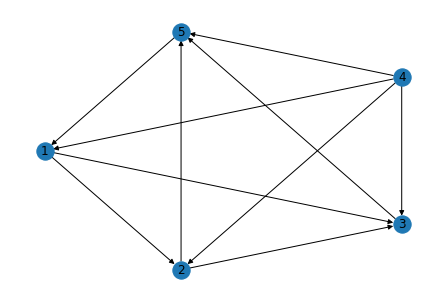

In [52]:
DG = nx.DiGraph()
new_nodes = (1,2,3,4,5)
new_edges = [(1,2), (2,5), (2,3), (5,1), (4,2), (4,1), (3,5), (4,3), (4,5), (1,3)]
DG.add_nodes_from(new_nodes)
DG.add_edges_from(new_edges)
nx.draw_shell(DG, with_labels=True)
plt.show()

**Task 3**
For each node in the graph that you generated in task 2, compute how many nodes are reachable using a BFS traversal starting at that node. Report these for all nodes in the graph. For every node, print a list that includes the node and all reachable nodes for that node.

In [53]:
import networkx as nx

DG = nx.DiGraph()
new_nodes = (1,2,3,4,5)
new_edges = [(1,2), (2,5), (2,3), (5,1), (4,2), (4,1), (3,5), (4,3), (4,5), (1,3)]
DG.add_nodes_from(new_nodes)
DG.add_edges_from(new_edges)


for n in DG.nodes:
    count = 0
    edges = []
    all_edges = nx.bfs_edges(DG,n)
    for e in list(all_edges):
        count+=1
        edges.append(int(e[1]))
    edges.sort()
    print("Using BFS, node ",n, " can reach ",count, "nodes: ", edges)


Using BFS, node  1  can reach  3 nodes:  [2, 3, 5]
Using BFS, node  2  can reach  3 nodes:  [1, 3, 5]
Using BFS, node  3  can reach  3 nodes:  [1, 2, 5]
Using BFS, node  4  can reach  4 nodes:  [1, 2, 3, 5]
Using BFS, node  5  can reach  3 nodes:  [1, 2, 3]
